In [1]:
import functools
import os

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [3]:
import lib

In [4]:
def watermark(
    fig,
    text="preliminary",
):
    fig_width, fig_height = fig.get_size_inches()
    angle = np.degrees(np.arctan2(fig_height, fig_width))
    size = np.hypot(fig_width, fig_height) * 6 
    fig.text(
        0.5,
        0.5,
        text,
        color="k",
        alpha=0.1,
        fontsize=size,
        rotation=angle,
        horizontalalignment="center",
        verticalalignment="center",
    )

    return None

In [5]:
shear_step = "g1_slice=0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0"

In [6]:
redshift_sim = h5py.File(
    os.path.join(
        "/global/cfs/cdirs/des/boyan/sompz_output/y6_imsim_1000Tile/",
        shear_step,
        "noshear/weighted_pile3_oldtomo/sompz_y6_sim_noshear_1000Tile.hdf5",
    )
)

In [7]:
shear_sim = h5py.File(
    lib.const.IMSIM_CATALOGS[shear_step],
)

In [8]:
truth_match = h5py.File(
    lib.const.MATCH_CATALOGS[shear_step],
)

In [9]:
_, shear_sim_index, redshift_sim_index = np.intersect1d(
    shear_sim["mdet/noshear"]["uid"],
    redshift_sim["catalog/sompz/noshear"]["coadd_object_id"],
    return_indices=True,
)

In [10]:
np.testing.assert_equal(
    shear_sim["mdet/noshear"]["uid"][:][shear_sim_index],
    redshift_sim["catalog/sompz/noshear"]["coadd_object_id"][:][redshift_sim_index],
)

In [11]:
bhat_sim = np.full(shear_sim["mdet/noshear"]["uid"].shape, np.nan)
bhat_sim[shear_sim_index] = redshift_sim["catalog/sompz/noshear"]["bhat"][:][redshift_sim_index]

In [12]:
cell_sim = np.full(shear_sim["mdet/noshear"]["uid"].shape, np.nan)
cell_sim[shear_sim_index] = redshift_sim["catalog/sompz/noshear"]["cell_wide"][:][redshift_sim_index]

In [13]:
weights_sim = lib.weights.get_shear_weights(shear_sim["mdet/noshear"])

In [14]:
count_grid_sim, _, _ = stats.binned_statistic(
    cell_sim,
    None,
    statistic="count",
    bins=lib.const.CELL_IDS,
)
occupancy_grid_sim = count_grid_sim / sum(count_grid_sim)

In [15]:
_weight_grid_sim, _, _ = stats.binned_statistic(
    cell_sim,
    weights_sim,
    statistic="sum",
    bins=lib.const.CELL_IDS,
)
weight_grid_sim = _weight_grid_sim / sum(_weight_grid_sim)

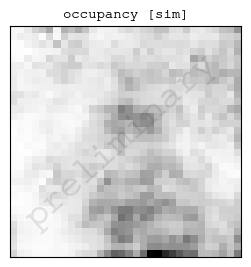

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    occupancy_grid_sim.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("occupancy [sim]")

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

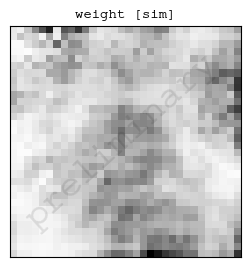

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    weight_grid_sim.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("weight [sim]")

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

---

In [18]:
shear_y6 = h5py.File(lib.const.Y6_SHEAR_CATALOG)
redshift_y6 = h5py.File(lib.const.Y6_REDSHIFT_CATALOG)

In [19]:
_, shear_y6_index, redshift_y6_index = np.intersect1d(
    shear_y6["mdet/noshear"]["uid"],
    redshift_y6["sompz/noshear"]["coadd_object_id"],
    return_indices=True,
)

In [20]:
bhat_y6 = np.full(shear_y6["mdet/noshear"]["uid"].shape, np.nan)
bhat_y6[shear_y6_index] = redshift_y6["sompz/noshear"]["bhat"][:][redshift_y6_index]

In [21]:
cell_y6 = np.full(shear_y6["mdet/noshear"]["uid"].shape, np.nan)
cell_y6[shear_y6_index] = redshift_y6["sompz/noshear"]["cell_wide"][:][redshift_y6_index]

In [22]:
weights_y6 = lib.weights.get_shear_weights(shear_y6["mdet/noshear"])

In [23]:
count_grid_y6, _, _ = stats.binned_statistic(
    cell_y6,
    None,
    statistic="count",
    bins=lib.const.CELL_IDS,
)
occupancy_grid_y6 = count_grid_y6 / sum(count_grid_y6)

In [24]:
_weight_grid_y6, _, _ = stats.binned_statistic(
    cell_y6,
    weights_y6,
    statistic="sum",
    bins=lib.const.CELL_IDS,
)
weight_grid_y6 = _weight_grid_y6 / sum(_weight_grid_y6)

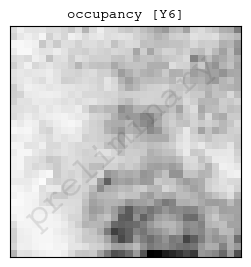

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    occupancy_grid_y6.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("occupancy [Y6]")

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

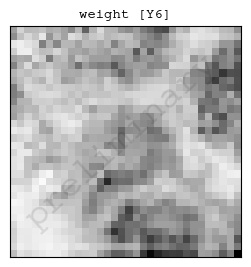

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    weight_grid_y6.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("weight [Y6]")

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

---

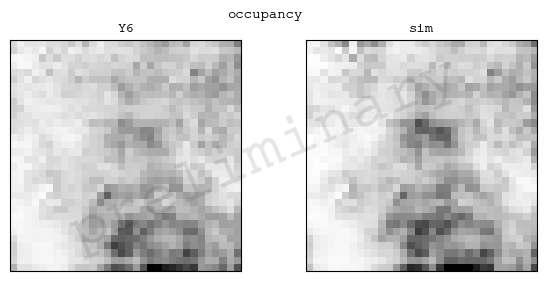

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

norm = mpl.colors.Normalize(vmin=0)

axs[0].imshow(
    occupancy_grid_y6.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    norm=norm,
)
axs[0].set_title("Y6")

axs[1].imshow(
    occupancy_grid_sim.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    norm=norm,
)
axs[1].set_title("sim")


for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("occupancy")

watermark(fig)

plt.show()

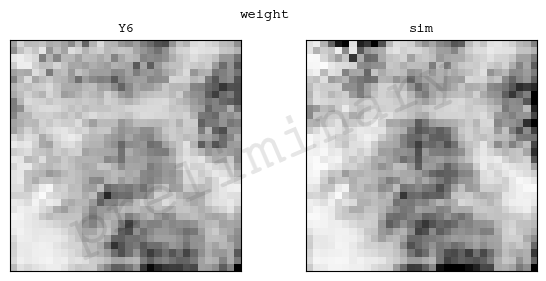

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

norm = mpl.colors.Normalize(vmin=0)

axs[0].imshow(
    weight_grid_y6.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    norm=norm,
)
axs[0].set_title("Y6")

axs[1].imshow(
    weight_grid_sim.reshape(lib.const.SOM_SHAPE),
    origin="lower",
    norm=norm,
)
axs[1].set_title("sim")


for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("weight")

watermark(fig)

plt.show()

In [29]:
np.var(occupancy_grid_y6), np.var(occupancy_grid_sim)

(3.671899408447018e-07, 5.205767734140469e-07)

In [30]:
np.var(weight_grid_y6), np.var(weight_grid_sim)

(2.408401797308064e-07, 3.7646127115587887e-07)

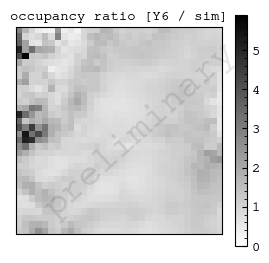

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    (occupancy_grid_y6 / occupancy_grid_sim).reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("occupancy ratio [Y6 / sim]")

fig.colorbar(im, ax=axs)

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

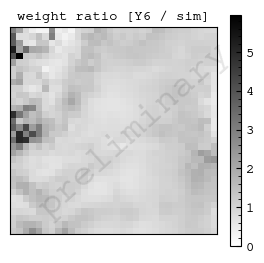

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    (weight_grid_y6 / weight_grid_sim).reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0,
)
axs.set_title("weight ratio [Y6 / sim]")

fig.colorbar(im, ax=axs)

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

---

In [37]:
# extend the last bin and "pileup"
zedges = np.copy(lib.const.ZEDGES)
zedges[-1] = 4.

_sum_weight, _, _, _ = stats.binned_statistic_2d(
    cell_sim,
    truth_match["mdet/noshear"]["z"],
    weights_sim,
    statistic="sum",
    bins=[lib.const.CELL_IDS, zedges],
)

nz = _sum_weight / np.diff(lib.const.ZEDGES)
# nz /= nz.sum()

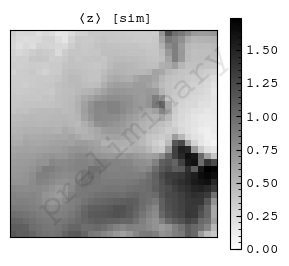

In [76]:
fig, axs = plt.subplots(1, 1, figsize=(3 + 4/12, 3))

im = axs.imshow(
    (
        np.sum(lib.const.ZVALS * nz, axis=1) 
        / np.sum(nz, axis=1)
    ).reshape(lib.const.SOM_SHAPE),
    origin="lower",
    vmin=0
)
axs.set_title("$〈z〉$ [sim]")

fig.colorbar(im, ax=axs)

axs.set_xticks([])
axs.set_yticks([])

watermark(fig)

plt.show()

---

In [33]:
cell_assignments = {}
for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
    cell_assignments[tomographic_bin] = np.unique(
        cell_sim[bhat_sim == tomographic_bin]
    ).astype(int)

assert len(
    functools.reduce(
        np.intersect1d,
        [
            cells
            for cells in cell_assignments.values()
        ],
    )
) == 0

---

# Statistical Weights

In [83]:
nz_tomo = {}
for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
    nz_tomo[tomographic_bin] = np.sum(
        nz[cell_assignments[tomographic_bin]] \
        * weights_sim[cell_assignments[tomographic_bin], np.newaxis],
        axis=0
    ) / np.sum(
        weights_sim[cell_assignments[tomographic_bin]]
    )
    # manually force n(0) = 0
    nz_tomo[tomographic_bin][0] = 0

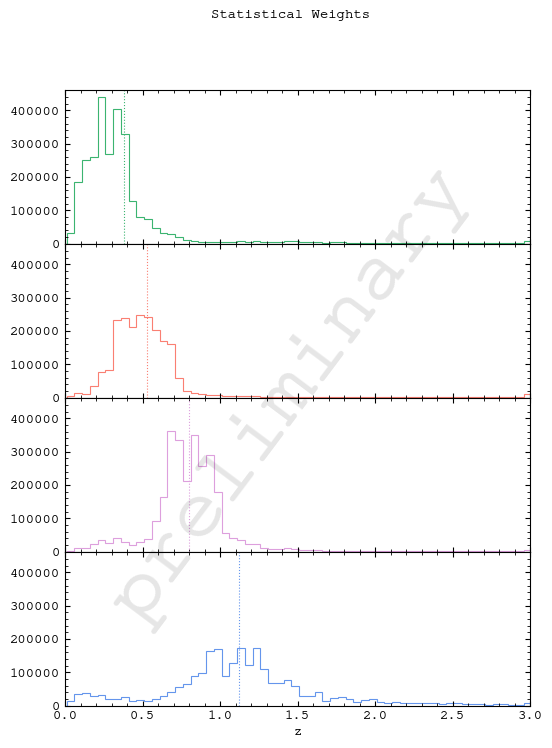

In [84]:
fig, axs = plt.subplots(len(lib.const.TOMOGRAPHIC_BINS), 1, figsize=(6, 8), sharex=True, sharey=True)

fig.subplots_adjust(wspace=0, hspace=0)

tomo_colors = {
    0: "#3BB470",
    1: "#FA7F72",
    2: "#DD9FDD",
    3: "#6495EC",
}

for i in lib.const.TOMOGRAPHIC_BINS:
    axs[i].axvline(
        np.average(lib.const.ZVALS, weights=nz_tomo[i]),
        c=tomo_colors[i],
        ls=":",
    )
    
    axs[i].stairs(
        nz_tomo[i],
        edges=lib.const.ZEDGES,
        ec=tomo_colors[i],
    )

axs[-1].set_xlim(0, 3)
axs[-1].set_ylim(0, None)

axs[-1].set_xlabel("z")

# axs[-1].set_yscale("log")
# axs[0].legend()

fig.suptitle("Statistical Weights")

watermark(fig)

plt.show()

# Statistical Weights & Response [TODO]

In [81]:
nz_tomo = {}
for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
    nz_tomo[tomographic_bin] = np.sum(
        nz[cell_assignments[tomographic_bin]] \
        * response_sim[cell_assignments[tomographic_bin], np.newaxis] \
        * weights_sim[cell_assignments[tomographic_bin], np.newaxis],
        axis=0
    ) / np.sum(
        response_sim[cell_assignments[tomographic_bin]] \
        * weights_sim[cell_assignments[tomographic_bin]]
    )
    # manually force n(0) = 0
    nz_tomo[tomographic_bin][0] = 0

NameError: name 'response_sim' is not defined

KeyError: 0

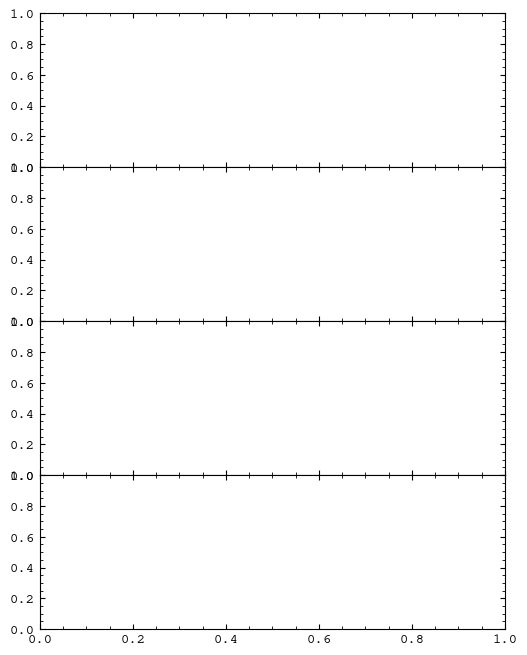

In [82]:
fig, axs = plt.subplots(len(lib.const.TOMOGRAPHIC_BINS), 1, figsize=(6, 8), sharex=True, sharey=True)

fig.subplots_adjust(wspace=0, hspace=0)

tomo_colors = {
    0: "#3BB470",
    1: "#FA7F72",
    2: "#DD9FDD",
    3: "#6495EC",
}

for i in lib.const.TOMOGRAPHIC_BINS:
    axs[i].axvline(
        np.average(lib.const.ZVALS, weights=nz_tomo[i]),
        c=tomo_colors[i],
        ls=":",
    )
    
    axs[i].stairs(
        nz_tomo[i],
        edges=lib.const.ZEDGES,
        ec=tomo_colors[i],
    )

axs[-1].set_xlim(0, 3)
axs[-1].set_ylim(0, None)

axs[-1].set_xlabel("z")

# axs[-1].set_yscale("log")
# axs[0].legend()

fig.suptitle("Statistical Weights & Response")

watermark(fig)

plt.show()

# Statistical Weights & Occupancy Ratio

In [85]:
nz_tomo = {}
for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
    nz_tomo[tomographic_bin] = np.sum(
        nz[cell_assignments[tomographic_bin]] \
        * (occupancy_grid_y6 / occupancy_grid_sim)[cell_assignments[tomographic_bin], np.newaxis] \
        * weights_sim[cell_assignments[tomographic_bin], np.newaxis],
        axis=0
    ) / np.sum(
        (occupancy_grid_y6 / occupancy_grid_sim)[cell_assignments[tomographic_bin]] \
        * weights_sim[cell_assignments[tomographic_bin]]
    )
    # manually force n(0) = 0
    nz_tomo[tomographic_bin][0] = 0

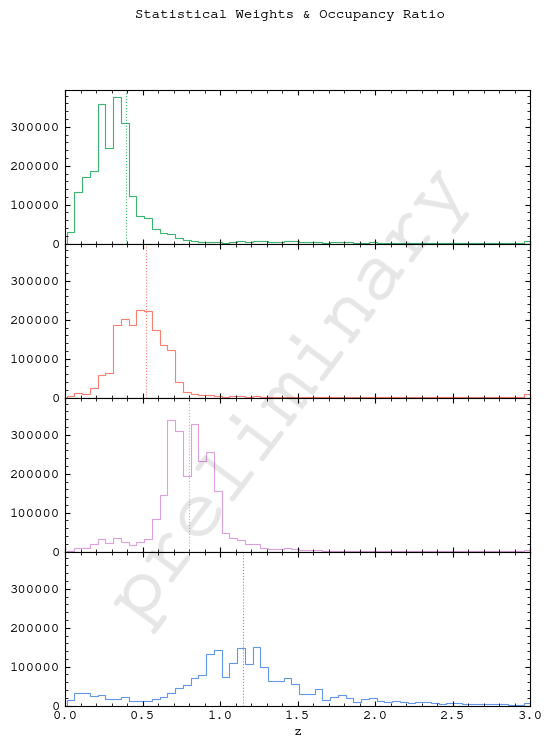

In [86]:
fig, axs = plt.subplots(len(lib.const.TOMOGRAPHIC_BINS), 1, figsize=(6, 8), sharex=True, sharey=True)

fig.subplots_adjust(wspace=0, hspace=0)

tomo_colors = {
    0: "#3BB470",
    1: "#FA7F72",
    2: "#DD9FDD",
    3: "#6495EC",
}

for i in lib.const.TOMOGRAPHIC_BINS:
    axs[i].axvline(
        np.average(lib.const.ZVALS, weights=nz_tomo[i]),
        c=tomo_colors[i],
        ls=":",
    )
    
    axs[i].stairs(
        nz_tomo[i],
        edges=lib.const.ZEDGES,
        ec=tomo_colors[i],
    )

axs[-1].set_xlim(0, 3)
axs[-1].set_ylim(0, None)

axs[-1].set_xlabel("z")

# axs[-1].set_yscale("log")
# axs[0].legend()

fig.suptitle("Statistical Weights & Occupancy Ratio")

watermark(fig)

plt.show()

# Statistical Weights & Weight Ratio

In [87]:
nz_tomo = {}
for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
    nz_tomo[tomographic_bin] = np.sum(
        nz[cell_assignments[tomographic_bin]] \
        * (weight_grid_y6 / weight_grid_sim)[cell_assignments[tomographic_bin], np.newaxis] \
        * weights_sim[cell_assignments[tomographic_bin], np.newaxis],
        axis=0
    ) / np.sum(
        (occupancy_grid_y6 / occupancy_grid_sim)[cell_assignments[tomographic_bin]] \
        * weights_sim[cell_assignments[tomographic_bin]]
    )
    # manually force n(0) = 0
    nz_tomo[tomographic_bin][0] = 0

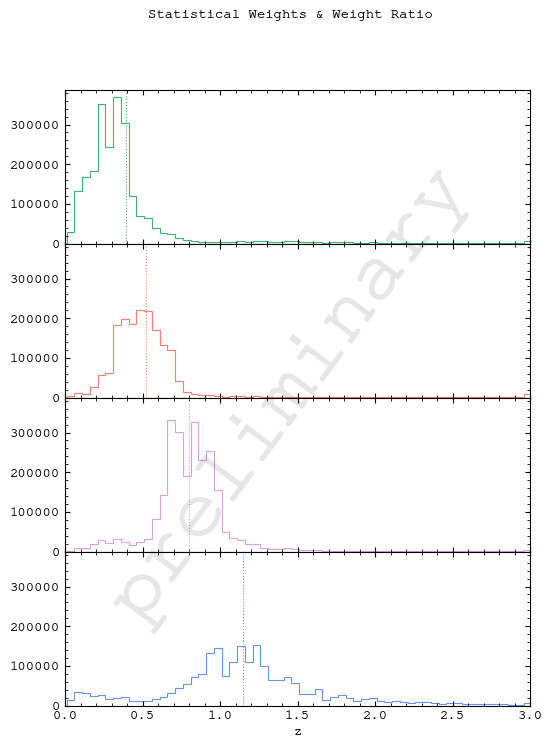

In [88]:
fig, axs = plt.subplots(len(lib.const.TOMOGRAPHIC_BINS), 1, figsize=(6, 8), sharex=True, sharey=True)

fig.subplots_adjust(wspace=0, hspace=0)

tomo_colors = {
    0: "#3BB470",
    1: "#FA7F72",
    2: "#DD9FDD",
    3: "#6495EC",
}

for i in lib.const.TOMOGRAPHIC_BINS:
    axs[i].axvline(
        np.average(lib.const.ZVALS, weights=nz_tomo[i]),
        c=tomo_colors[i],
        ls=":",
    )
    
    axs[i].stairs(
        nz_tomo[i],
        edges=lib.const.ZEDGES,
        ec=tomo_colors[i],
    )

axs[-1].set_xlim(0, 3)
axs[-1].set_ylim(0, None)

axs[-1].set_xlabel("z")

# axs[-1].set_yscale("log")
# axs[0].legend()

fig.suptitle("Statistical Weights & Weight Ratio")

watermark(fig)

plt.show()